# Creating your own dataset from Google Images

*by: Francisco Ingham and Jeremy Howard. Inspired by [Adrian Rosebrock](https://www.pyimagesearch.com/2017/12/04/how-to-create-a-deep-learning-dataset-using-google-images/)*

In this tutorial we will see how to easily create an image dataset through Google Images. **Note**: You will have to repeat these steps for any new category you want to Google (e.g once for dogs and once for cats).

In [1]:
from fastai.vision import *

## Get a bunch of images!

![Discord pict](http://www.datascienceseed.com/wp-content/uploads/2019/06/gdownload.jpg)

## Google Images Download

https://google-images-download.readthedocs.io/en/latest/index.html

`googleimagesdownload -cf config.txt`

Configuration file:

```Json
{
    "Records": [
        {
            "keywords": "mazinga",
            "limit": 300,
            "print_urls": true,
			"chromedriver": "C:\\Users\\emamorc\\Google Drive\\AIML\\Trainings\\2019-01-27 Fast.ai\\chromedriver_win32\\chromedriver.exe"
        },
        {
            "keywords": "goldrake",
            "limit": 300,
            "print_urls": true,
			"chromedriver": "C:\\Users\\emamorc\\Google Drive\\AIML\\Trainings\\2019-01-27 Fast.ai\\chromedriver_win32\\chromedriver.exe"

        },
        {
            "keywords": "jeeg",
            "limit": 300,
            "print_urls": true,
			"chromedriver": "C:\\Users\\emamorc\\Google Drive\\AIML\\Trainings\\2019-01-27 Fast.ai\\chromedriver_win32\\chromedriver.exe"

        },
        {
            "keywords": "tekkaman",
            "limit": 300,
            "print_urls": true,
			"chromedriver": "C:\\Users\\emamorc\\Google Drive\\AIML\\Trainings\\2019-01-27 Fast.ai\\chromedriver_win32\\chromedriver.exe"

        },
        {
            "keywords": "daitarn3",
            "limit": 300,
            "print_urls": true,
			"chromedriver": "C:\\Users\\emamorc\\Google Drive\\AIML\\Trainings\\2019-01-27 Fast.ai\\chromedriver_win32\\chromedriver.exe"

        },
        {
            "keywords": "icub",
            "limit": 300,
            "print_urls": true,
			"chromedriver": "C:\\Users\\emamorc\\Google Drive\\AIML\\Trainings\\2019-01-27 Fast.ai\\chromedriver_win32\\chromedriver.exe"

        }
    ]
}

```

Review images in your file explorer, cleanup and zip in single file 'download.zip'

Create directory and upload files into your server

Upload your .zip file. You just need to press 'Upload' in your working directory and select your file, then click 'Upload' for each of the displayed files.

![uploaded file](https://raw.githubusercontent.com/fastai/course-v3/master/nbs/dl1/images/download_images/upload.png)

In [2]:
path = Path('data/robots2')

In [3]:
path.ls()

[PosixPath('data/robots2/test'),
 PosixPath('data/robots2/downloads.zip'),
 PosixPath('data/robots2/test.zip'),
 PosixPath('data/robots2/tv')]

Working with ZipFiles

https://docs.python.org/2/library/zipfile.html#


In [5]:
import sys
import zipfile

In [10]:
target_zipfile = path/'downloads.zip'
target_dir = path/'tv'

In [11]:
with zipfile.ZipFile(target_zipfile, 'r', zipfile.ZIP_DEFLATED) as zfp:
    print('[info] Listing contents of archive:')
    zfp.printdir()
    print('[info] Extracting files under %s' %(target_dir))
    zfp.extractall(target_dir)
    zfp.close()

[info] Listing contents of archive:
File Name                                             Modified             Size
daitarn3/                                      2019-06-21 22:48:54            0
daitarn3/1.237px-Daitarn3dynit-cover.jpg       2019-06-21 22:35:14        36729
daitarn3/10.daitarn.jpg                        2019-06-21 22:35:18        67168
daitarn3/100.57674279_572894646566351_1967280708783447981_n.jpg 2019-06-21 22:35:52        31004
daitarn3/101.dait-hist.jpg                     2019-06-21 22:35:52         3510
daitarn3/102.59596855_139955983826650_6309527294448826801_n.jpg 2019-06-21 22:35:52        53917
daitarn3/103.64601299_2764731913540088_1382843570158015356_n.jpg 2019-06-21 22:35:54        71976
daitarn3/104.58620621_350794418880929_2280023334525604182_n.jpg 2019-06-21 22:35:54        40919
daitarn3/105.53425021_794146114294639_3475855623703778791_n.jpg 2019-06-21 22:35:54        74625
daitarn3/106.59693907_2415315068533278_2565841889454808_n.jpg 2019-06-21 22:35

In [4]:
path = Path('data/robots2/tv')
path.ls()

[PosixPath('data/robots2/tv/goldrake'),
 PosixPath('data/robots2/tv/models'),
 PosixPath('data/robots2/tv/icub'),
 PosixPath('data/robots2/tv/mazinga'),
 PosixPath('data/robots2/tv/daitarn3'),
 PosixPath('data/robots2/tv/export.pkl'),
 PosixPath('data/robots2/tv/tekkaman'),
 PosixPath('data/robots2/tv/jeeg')]

pathlib documentation https://docs.python.org/3/library/pathlib.html


In [7]:
# get root filename of all files with extension .txt
# I'm sure there is a smarter way!
classes = [s.name for s in path.ls() if s.is_dir()] 
classes

['goldrake', 'models', 'icub', 'mazinga', 'daitarn3', 'tekkaman', 'jeeg']

In [34]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

In [35]:
doc(verify_images)

## View data

In [9]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [49]:
# If you already cleaned your data, run this cell instead of the one before
# np.random.seed(42)
# data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#         ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [10]:
data.classes

['daitarn3', 'goldrake', 'icub', 'jeeg', 'mazinga', 'tekkaman']

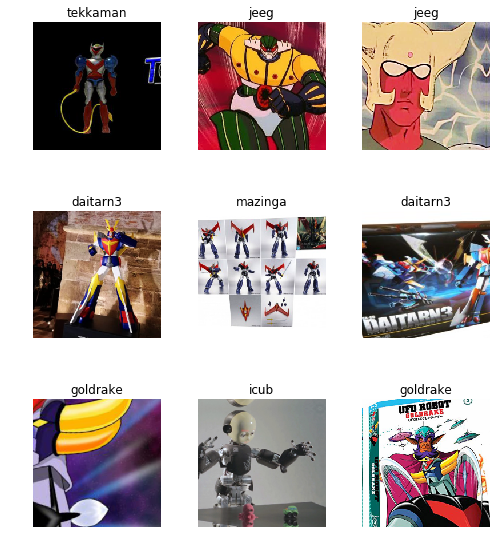

In [11]:
data.show_batch(rows=3, figsize=(7,8))

In [12]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['daitarn3', 'goldrake', 'icub', 'jeeg', 'mazinga', 'tekkaman'], 6, 1332, 332)

## Train model

In [13]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [14]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.658090,0.739123,0.250000,00:10
1,1.122830,0.571791,0.201807,00:09
2,0.868901,0.539211,0.171687,00:08
3,0.709697,0.532708,0.171687,00:08


With smaller and less clean dataset error_rate after 4 epochs was 21%

In [15]:
learn.save('stage-1')

In [16]:
learn.unfreeze()

In [17]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


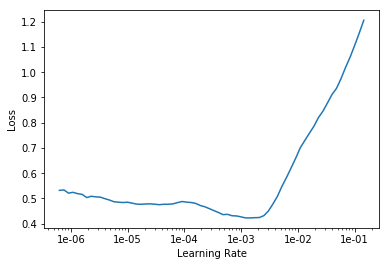

In [18]:
learn.recorder.plot()

In [19]:
learn.fit_one_cycle(5, max_lr=slice(6e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.494293,0.442739,0.144578,00:09
1,0.398317,0.420582,0.132530,00:09
2,0.282382,0.331940,0.102410,00:09
3,0.204659,0.303944,0.111446,00:08
4,0.156335,0.284276,0.099398,00:09


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


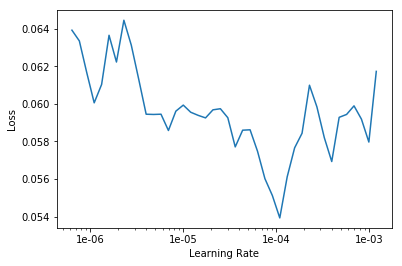

In [20]:
learn.lr_find()
learn.recorder.plot()

Run again lr_find ... I suspect it may be unstable

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


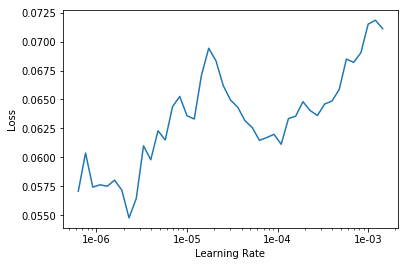

In [21]:
learn.lr_find()
learn.recorder.plot()

In [22]:
learn.save('stage-2-prel')

In [23]:
learn.fit_one_cycle(5, max_lr=slice(2e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.071238,0.274797,0.096386,00:09
1,0.069177,0.253772,0.093373,00:09
2,0.062646,0.257680,0.105422,00:09
3,0.054933,0.257492,0.099398,00:09
4,0.051771,0.259876,0.096386,00:09


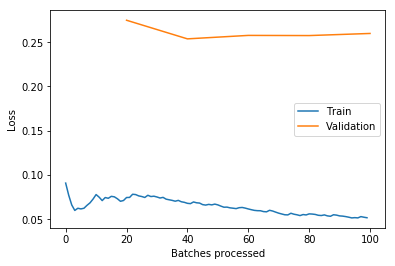

In [24]:
learn.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


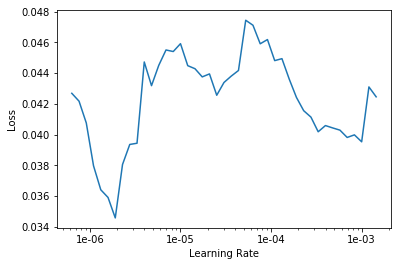

In [25]:
learn.lr_find()
learn.recorder.plot()

In [26]:
learn.save('stage-2-prel-2')

In [27]:
learn.fit_one_cycle(10, max_lr=slice(2e-4,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.044419,0.260050,0.102410,00:09
1,0.057573,0.407472,0.147590,00:09
2,0.172093,1.210685,0.250000,00:08
3,0.292010,11.363816,0.653614,00:09
4,0.308125,0.446164,0.165663,00:08
5,0.261066,0.218622,0.060241,00:10
6,0.205862,0.214289,0.078313,00:09
7,0.162468,0.190670,0.060241,00:09
8,0.126628,0.187324,0.066265,00:09
9,0.102960,0.195433,0.066265,00:09


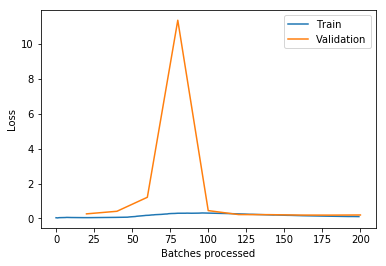

In [28]:
learn.recorder.plot_losses()

In [29]:
learn.save('stage-2-prel-3')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


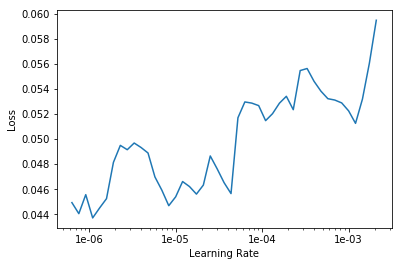

In [30]:
learn.lr_find()
learn.recorder.plot()

In [31]:
learn.fit_one_cycle(30, max_lr=slice(4e-6,9e-6))

epoch,train_loss,valid_loss,error_rate,time
0,0.047181,0.191361,0.066265,00:09
1,0.045173,0.191587,0.063253,00:09
2,0.047616,0.190394,0.063253,00:09
3,0.047101,0.191028,0.063253,00:09
4,0.046181,0.182543,0.063253,00:08
5,0.050630,0.188961,0.066265,00:08
6,0.047867,0.185593,0.057229,00:09
7,0.048172,0.186381,0.063253,00:09
8,0.046639,0.185873,0.066265,00:09
9,0.045157,0.184828,0.060241,00:09


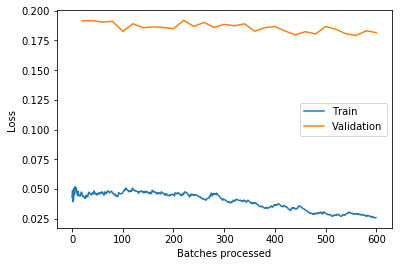

In [32]:
learn.recorder.plot_losses()

## Interpretation

In [33]:
learn.load('stage-2-prel-3');

In [34]:
interp = ClassificationInterpretation.from_learner(learn)

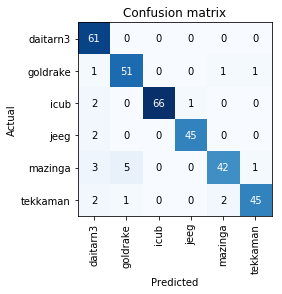

In [35]:
interp.plot_confusion_matrix()

In [36]:
losses,idxs = interp.top_losses()

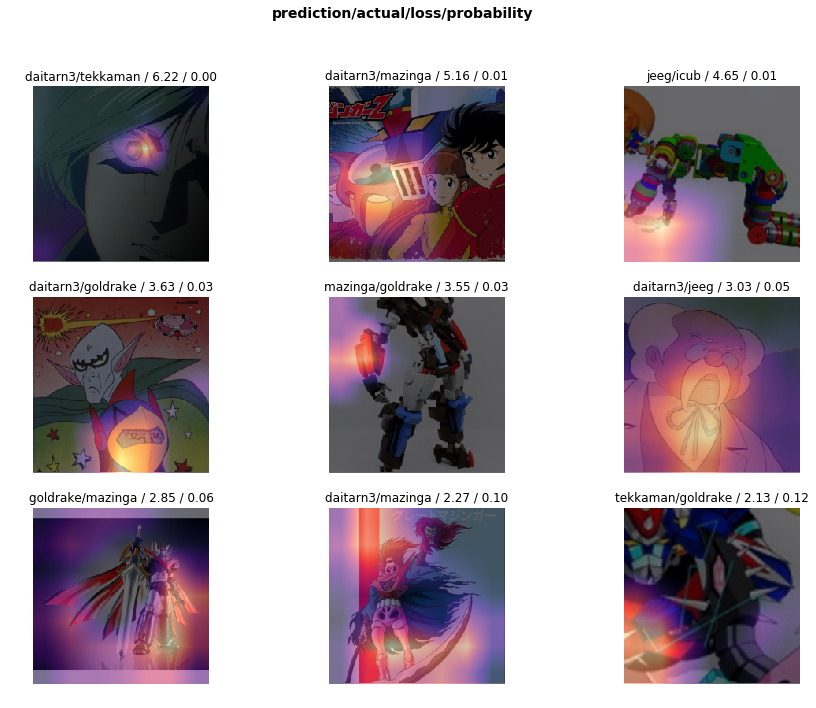

In [37]:
interp.plot_top_losses(9, figsize=(15,11))

## Putting your model in production

First thing first, let's export the content of our `Learner` object for production:

In [83]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

In [84]:
defaults.device

device(type='cuda', index=0)

In [85]:
defaults.device == torch.device('cuda',index=0)

True

In [86]:
defaults.device = torch.device('cpu')

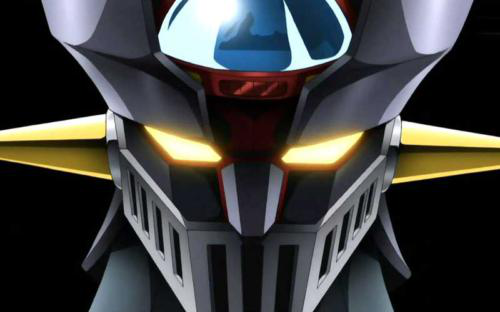

In [87]:
img = open_image(path/'mazinga'/'102.Mazinga-Z.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

In [88]:
learn = load_learner(path)

In [89]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category mazinga

So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

https://course.fast.ai/deployment_render.html#one-time-setup


## Things that can go wrong

- Most of the time things will train fine with the defaults
- There's not much you really need to tune (despite what you've heard!)
- Most likely are
  - Learning rate
  - Number of epochs

### Learning rate (LR) too high

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(1, max_lr=0.5)

Total time: 00:13
epoch  train_loss  valid_loss  error_rate       
1      12.220007   1144188288.000000  0.765957    (00:13)



### Learning rate (LR) too low

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Previously we had this result:

```
Total time: 00:57
epoch  train_loss  valid_loss  error_rate
1      1.030236    0.179226    0.028369    (00:14)
2      0.561508    0.055464    0.014184    (00:13)
3      0.396103    0.053801    0.014184    (00:13)
4      0.316883    0.050197    0.021277    (00:15)
```

In [ ]:
learn.fit_one_cycle(5, max_lr=1e-5)

Total time: 01:07
epoch  train_loss  valid_loss  error_rate
1      1.349151    1.062807    0.609929    (00:13)
2      1.373262    1.045115    0.546099    (00:13)
3      1.346169    1.006288    0.468085    (00:13)
4      1.334486    0.978713    0.453901    (00:13)
5      1.320978    0.978108    0.446809    (00:13)



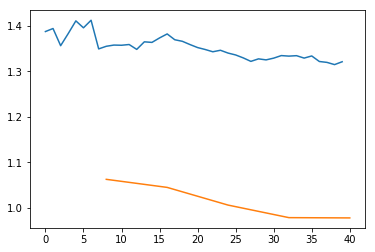

In [ ]:
learn.recorder.plot_losses()

As well as taking a really long time, it's getting too many looks at each image, so may overfit.

### Too few epochs

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate, pretrained=False)

In [ ]:
learn.fit_one_cycle(1)

Total time: 00:14
epoch  train_loss  valid_loss  error_rate
1      0.602823    0.119616    0.049645    (00:14)



### Too many epochs

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.9, bs=32, 
        ds_tfms=get_transforms(do_flip=False, max_rotate=0, max_zoom=1, max_lighting=0, max_warp=0
                              ),size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate, ps=0, wd=0)
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(40, slice(1e-6,1e-4))

Total time: 06:39
epoch  train_loss  valid_loss  error_rate
1      1.513021    1.041628    0.507326    (00:13)
2      1.290093    0.994758    0.443223    (00:09)
3      1.185764    0.936145    0.410256    (00:09)
4      1.117229    0.838402    0.322344    (00:09)
5      1.022635    0.734872    0.252747    (00:09)
6      0.951374    0.627288    0.192308    (00:10)
7      0.916111    0.558621    0.184982    (00:09)
8      0.839068    0.503755    0.177656    (00:09)
9      0.749610    0.433475    0.144689    (00:09)
10     0.678583    0.367560    0.124542    (00:09)
11     0.615280    0.327029    0.100733    (00:10)
12     0.558776    0.298989    0.095238    (00:09)
13     0.518109    0.266998    0.084249    (00:09)
14     0.476290    0.257858    0.084249    (00:09)
15     0.436865    0.227299    0.067766    (00:09)
16     0.457189    0.236593    0.078755    (00:10)
17     0.420905    0.240185    0.080586    (00:10)
18     0.395686    0.255465    0.082418    (00:09)
19     0.373232    0.2